# **ARTIFICIAL INTELLIGENCE NANODEGREE**
CIFAR-10 DATASET (*CNN TRAINING*)

In [2]:
# STEP 1= LOAD CIFAR-10 DATABASE

import keras 
from keras.datasets import cifar10

# load the pre-shuffles test-train data
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

Using TensorFlow backend.


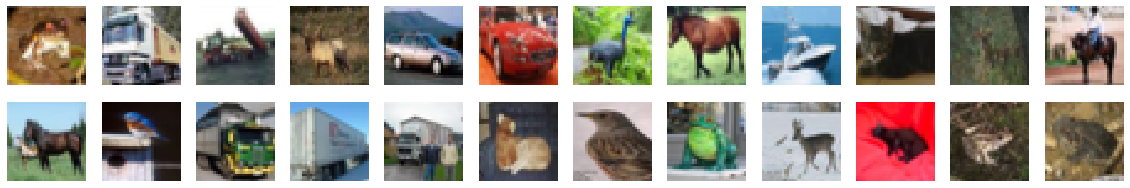

In [3]:
# STEP 2= VISUALIZE  THE FIRST  24 TRAINING IMAGES 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure(figsize=(20,5))
for i in range(24):
  ax=fig.add_subplot(3,12,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(X_train[i]))

In [0]:
# STEP 3= RESCALE THE IMAGES BY DIVIDING EVERY PIXEL IN EVERY IMAGE BY 255(rescale[0,255]--->[0,1])

X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255



In [7]:
# STEP 4= BREAK THE DATASETS INTO TRAINING,TESTING AND VALIDATION SETS

from keras.utils import np_utils


# one-hot encode the labels
num_classes=len(np.unique(y_train))
y_train=np_utils.to_categorical(y_train,num_classes)
y_test=np_utils.to_categorical(y_test,num_classes)


# break training set into training and validation sets
X_train,X_valid=X_train[5000:],X_train[:5000]
y_train,y_valid=y_train[5000:],y_train[:5000]

print('X_train shape:',X_train.shape)

print('number of training samples ',X_train.shape[0])
print('number of testing samples',X_test.shape[0])
print('number of validation samples ',X_valid.shape[0])


IndexError: ignored

In [10]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(X_train, X_valid) = X_train[5000:], X_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', X_train.shape)

# print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_valid.shape[0], 'validation samples')

IndexError: ignored

In [0]:
# STEP 5= DEFINE THE MODEL OF ARCHITECTURE

from keras.layers import Dense,Dropout,Flatten.Conv2D,MaxPooling2D
from keras.models import Sequential

model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding='same',activation='relu',input_shape(32,32,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())  # flatten convert multi-dimensional data into one-dimensional
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

model.summary()

In [0]:
# STEP 6= COMPILE THE MODEL

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])


In [0]:
#STEP 7= TRAIN THE MODEL

from keras.callbacks import ModelCheckpoint

checkpointer=ModelCheckpoint(filepath='CNN.weights.best.hdf5',verbose=1,save_best_only=True)
hist=model.fit(X_train,y_train,batch_size=32,epochs=10,validation_data=(X_valid,y_valid),callbacks=[checkpointer],verbose=2,shuffle=True)

In [0]:
# STEP 8= LOAD THE MODEL WITH BEST VALIDATION ACCURACY

# load the weights that yielded best validation accuracy
model.load_weights('CNN.weights,best.hdf5')

In [0]:
# STEP 9= CALCULATE THE CLASSIFICATION ACCURACY ON TEST DATASET

score=model.evaluate(X_test,y_test,verbose=0)
print(score)
print('\n','Test accuracy:',score[1])

In [0]:
# STEP 10= VISUALIZE SOME PREDICTIONS

preds= model.predict(X_test)

cifar10_labels=['airplane','automobile','bird','cat','dear','dog','frog','horse','ship','truck']


In [0]:
# plot a random sample of test images ,their predicted labels and ground truth

fig=plt.figure(figsize=(20,8))
for i,idx in enumerate(np.random.choice(X_test.shape[0],size=32,replace=False)):
  ax=fig.add_subplot(4,8,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(X_test[idx]))
  pred_idx=np.argmax(y_hat[idx])
  true_idx=np.argmax(y_test[idx])
  ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),color=("green" if pred_idx == true_idx else "red"))